2.2.0


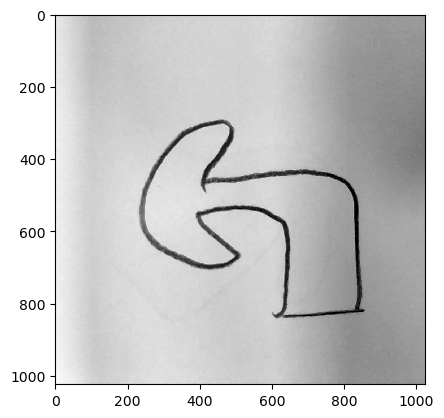

Found 276 images belonging to 3 classes.
Found 117 images belonging to 3 classes.
{0: 'L', 1: 'R', 2: 'U'}
(24, 300, 300, 3)
(24,)


TypeError: from_generator() got an unexpected keyword argument 'output_signature'

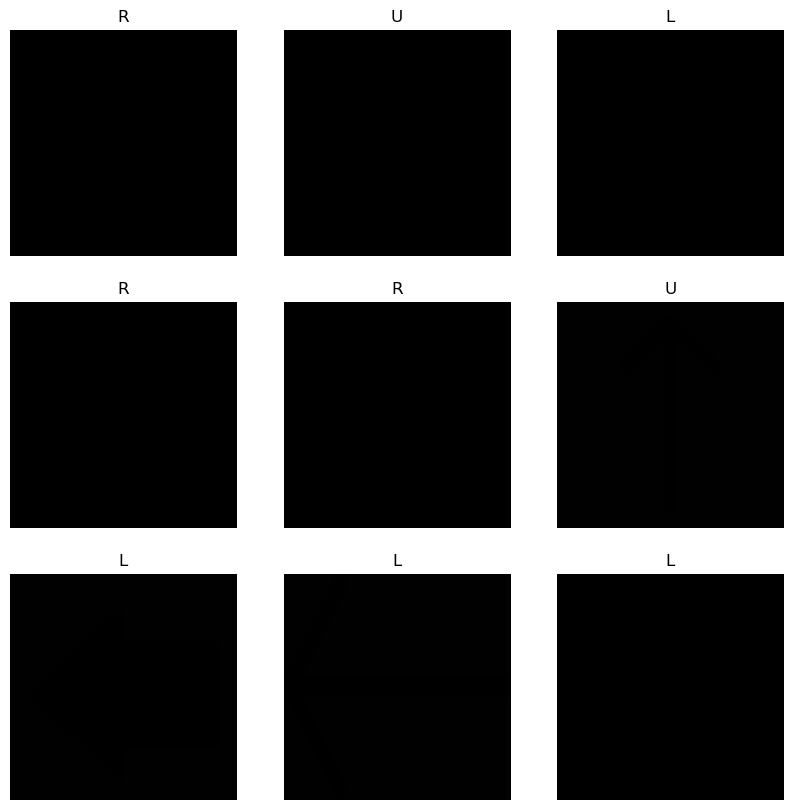

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import tensorflow as tf

print(tf.__version__)

DATADIR = "/home/vignesh/Documents/cnn_mars"
CATEGORIES = ["L", "R", "U"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # path to right, up, and left arrows dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

# Batch - Size - Width
batch_size = 24
img_height = 300
img_width = 300

# Train And Validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3)

train_ds = datagen.flow_from_directory(
    DATADIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    seed=123)

val_ds = datagen.flow_from_directory(
    DATADIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    seed=123)

# Get the class indices
class_indices = train_ds.class_indices

# Create a reverse mapping from indices to class names
class_names = {v: k for k, v in class_indices.items()}
print(class_names)

# Get one batch from the iterator
images, labels = next(train_ds)

plt.figure(figsize=(10, 10))
for i in range(min(9, len(labels))):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(class_names[int(labels[i])])  # Use the reverse mapping here
    plt.axis("off")

# ... (rest of your code)


for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

AUTOTUNE = tf.data.experimental.AUTOTUNE

# Create a dataset from the directory iterator
train_ds = tf.data.Dataset.from_generator(
    lambda: train_ds,
    output_signature=(
        tf.TensorSpec(shape=(img_height, img_width, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.float32),
    )
)

# Cache, shuffle, and prefetch using the dataset API
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Repeat this process for the validation dataset
val_ds = tf.data.Dataset.from_generator(
    lambda: val_ds,
    output_signature=(
        tf.TensorSpec(shape=(img_height, img_width, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.float32),
    )
)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ... (rest of your code)


# ... (rest of your code)


# ... (rest of your code)


normalization_layer = layers.Rescaling(1. / 255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Pixel değerleri [0,1] aralığında !
print(np.min(first_image), np.max(first_image))

num_classes = len(class_names)

model = tf.keras.applications.EfficientNetB3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax", )

model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('/home/vignesh/Documents/efficient_net_b_model')

In [ ]:
filepath='C:\\Users\\Monstar\\Desktop\\YSA\\Efficent3Model'
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow import keras
model = keras.models.load_model(filepath)

print("ArrayTest")

def array2dir(array):
    if array[0][0] > array[0][1] and array[0][0] > array[0][2]:
            print("sol")

    elif array[0][1] > array[0][0] and array[0][1] > array[0][2]:
            print("sağ")

    elif array[0][2] > array[0][1] and array[0][2] > array[0][0]:
            print("yukarı")

    else:
            print("HATA!")



import cv2
import time
# initialize the camera
i = 0
cam = cv2.VideoCapture(0)   # 0 -> index of camera
x=[[0.0,0.0,0.0]]
x=np.array(x)
print("Realtime Start")
while(True):
    s, img = cam.read()
    if s:    # frame captured without any errors
        cv2.imshow('Kamera', img)
        i+=1
        img=cv2.resize(img,(300,300))
        img = np.asarray(img)
        plt.imshow(img)
        img = np.expand_dims(img, axis=0)
        output = model.predict(img)
        i=0
        #print(output)
        array2dir(output)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cam.release()
 # Destroy all the windows
cv2.destroyAllWindows()

In [12]:
import tensorflow as tf
print(tf.test.is_gpu_available())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


2023-12-06 12:36:02.010697: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-12-06 12:36:02.045213: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2599990000 Hz
2023-12-06 12:36:02.046798: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f1f88000c20 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-12-06 12:36:02.046822: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-12-06 12:36:02.050928: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-12-06 12:36:02.209652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-06 12:36:02.209932:

In [13]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-12-06 12:36:54.288430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-06 12:36:54.288917: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 3.80GiB deviceMemoryBandwidth: 178.84GiB/s
2023-12-06 12:36:54.289063: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-12-06 12:36:54.289132: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-12-06 12:36:54.289183: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-12-06 12:36:54.289231: I tensorflow/stream_executor/p